# Exploratory Data Analysis


In this notebook, we're diving into our dataset to uncover any quirks or problems that might affect our ability to predict the winner of the March Madness tournament. We'll be exploring the data thoroughly, fixing any issues we find along the way. By the end, we aim to have a clean and reliable dataset that will help us make accurate predictions

We will be importing several datasets for our analysis, each serving a specific purpose:

- MTeams.csv: This dataset contains information about team participants, including their TeamID, name, and the first and last Division 1 seasons they participated in.
- MSeasons.csv: Here, we find details about the seasons and the regions they represent.

- MNCAATourneySeeds.csv: This dataset provides information about the team seedings and their respective TeamIDs.

- MRegularSeasonCompactResults.csv: This dataset includes information about regular season games, such as the seasons, DayNum, winning team ID (WTeamID), winning score (WScore), losing team ID (LTeamID), losing score (LScore), game location (Wloc), and number of overtime periods (NumOT).

- MNCAATourneyCompactResults.csv: Similar to the regular season results, this dataset contains information about tournament games, including the seasons, DayNum, WTeamID, WScore, LTeamID, LScore, Wloc, and NumOT. 

In [51]:
# We are going to import the libraries that we are going to use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')#We are going to use this library to ignore the warnings when printing our graphs

In [52]:
# We are going to import the data that we are going to use in this project
df_teams = pd.read_csv('../data1/MTeams.csv')
df_season = pd.read_csv('../data1/MSeasons.csv')
df_tourney_seeds = pd.read_csv('../data1/MNCAATourneySeeds.csv')
df_season_results = pd.read_csv('../data1/MRegularSeasonCompactResults.csv')
df_tourney_results = pd.read_csv('../data1/MNCAATourneyCompactResults.csv')

### Exploring
we will examine some basic statistics to understand our dataset better. As we explore the dataset, we will determine if there are any items that need to be reorganized or if there is data that may not significantly contribute to our analysis. This initial examination will help us focus on the most relevant data for our analysis.

In [53]:
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2023
1,1102,Air Force,1985,2023
2,1103,Akron,1985,2023
3,1104,Alabama,1985,2023
4,1105,Alabama A&M,2000,2023


In [54]:
# We are dropping our columns FirstD1Season and LastD1Season because we are not going to use them sincewe are not interested 
#in the first and last season that a team played
df_teams.drop(['FirstD1Season', 'LastD1Season'], axis=1, inplace=True)

In [55]:
df_season.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,1984-10-29,East,West,Midwest,Southeast
1,1986,1985-10-28,East,Midwest,Southeast,West
2,1987,1986-10-27,East,Southeast,Midwest,West
3,1988,1987-11-02,East,Midwest,Southeast,West
4,1989,1988-10-31,East,West,Midwest,Southeast


In [56]:
#We are also dropping the column DayZero because we are not going to use it in our analysis
df_season.drop(['DayZero'], axis =1, inplace=True)

In [57]:
df_tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [58]:
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [59]:
#We are going to drop the column NumOT because we are not going to use it in our analysis
df_season_results.drop(['NumOT'], axis=1, inplace=True)

In [60]:
df_tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [61]:
# We are going to drop the column NumOT because we are not going to use it in our analysis
df_tourney_results.drop(['NumOT'], axis=1, inplace=True)

In [62]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TeamID    377 non-null    int64 
 1   TeamName  377 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [63]:
df_season.info()
df_tourney_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   39 non-null     int64 
 1   RegionW  39 non-null     object
 2   RegionX  39 non-null     object
 3   RegionY  39 non-null     object
 4   RegionZ  39 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2490 non-null   int64 
 1   Seed    2490 non-null   object
 2   TeamID  2490 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.5+ KB


In [64]:
df_season_results.info()
df_tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   181682 non-null  int64 
 1   DayNum   181682 non-null  int64 
 2   WTeamID  181682 non-null  int64 
 3   WScore   181682 non-null  int64 
 4   LTeamID  181682 non-null  int64 
 5   LScore   181682 non-null  int64 
 6   WLoc     181682 non-null  object
dtypes: int64(6), object(1)
memory usage: 9.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2384 non-null   int64 
 1   DayNum   2384 non-null   int64 
 2   WTeamID  2384 non-null   int64 
 3   WScore   2384 non-null   int64 
 4   LTeamID  2384 non-null   int64 
 5   LScore   2384 non-null   int64 
 6   WLoc     2384 non-null   object
dtypes: int64(6), object(1)
memory usage: 130.5+ KB


In [65]:
# We are going to use pandas to concatenate the dataframes that we are going to use in this project so they are all in one place.
# We are choosing these dataframes because they are the ones that seems to be more relevant to our analysis
df_total = pd.concat([df_teams, df_season_results, df_tourney_results])

In [14]:
df_total.head(10)

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc
0,1101.0,Abilene Chr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1102.0,Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1103.0,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1104.0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1105.0,Alabama A&M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1106.0,Alabama St,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1107.0,SUNY Albany,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1108.0,Alcorn St,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1109.0,Alliant Intl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1110.0,American Univ,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will now introduce the fillna method to address null values in our dataset. Concatenating our dataframes has resulted in numerous null values, which could impact our analysis if not handled promptly. By addressing these null values now, we can prevent potential issues in the future.

In [16]:
df_total['WScore'] = df_total['WScore'].fillna(0)
df_total['LScore'] = df_total['LScore'].fillna(0)
df_total['WTeamID'] = df_total['WTeamID'].fillna(0)
df_total['LTeamID'] = df_total['LTeamID'].fillna(0)
df_total['WLoc'] = df_total['WLoc'].fillna(0)
df_total['DayNum'] = df_total['DayNum'].fillna(0)
df_total['Season'] = df_total['Season'].fillna(0)

In [17]:
df_total.head()

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc
0,1101.0,Abilene Chr,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1102.0,Air Force,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1103.0,Akron,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1104.0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1105.0,Alabama A&M,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
df_total['WLoc'].value_counts()

WLoc
H    107421
A     55740
N     20905
0       377
Name: count, dtype: int64

# Univariate Analysis

In this univariate analysis section, we will delve deeper into our dataset to identify any outliers visually. By spotting and addressing these outliers, we aim to prevent potential complications in our analysis and ensure the integrity of our data.

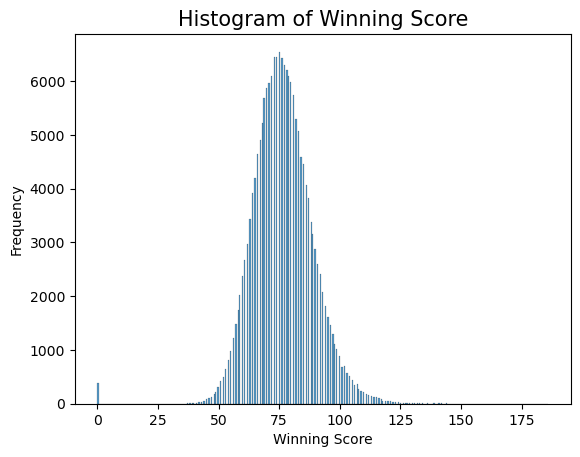

In [30]:
sns.histplot(data=df_total, x = 'WScore')
plt.title('Histogram of Winning Score', fontsize=15)
plt.xlabel('Winning Score')
plt.ylabel('Frequency')
plt.show()

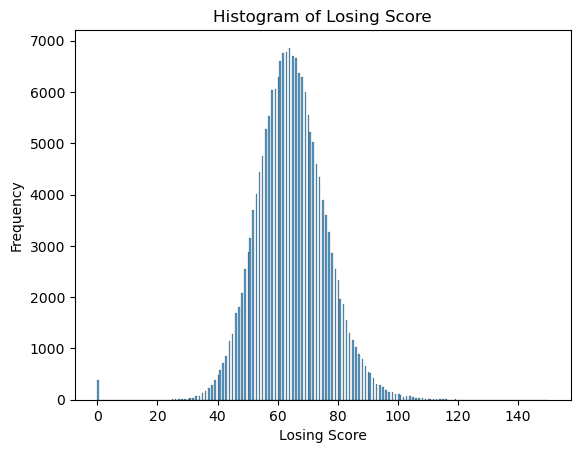

In [31]:
sns.histplot(data=df_total, x = 'LScore')
plt.title('Histogram of Losing Score')
plt.xlabel('Losing Score')
plt.ylabel('Frequency')
plt.show()

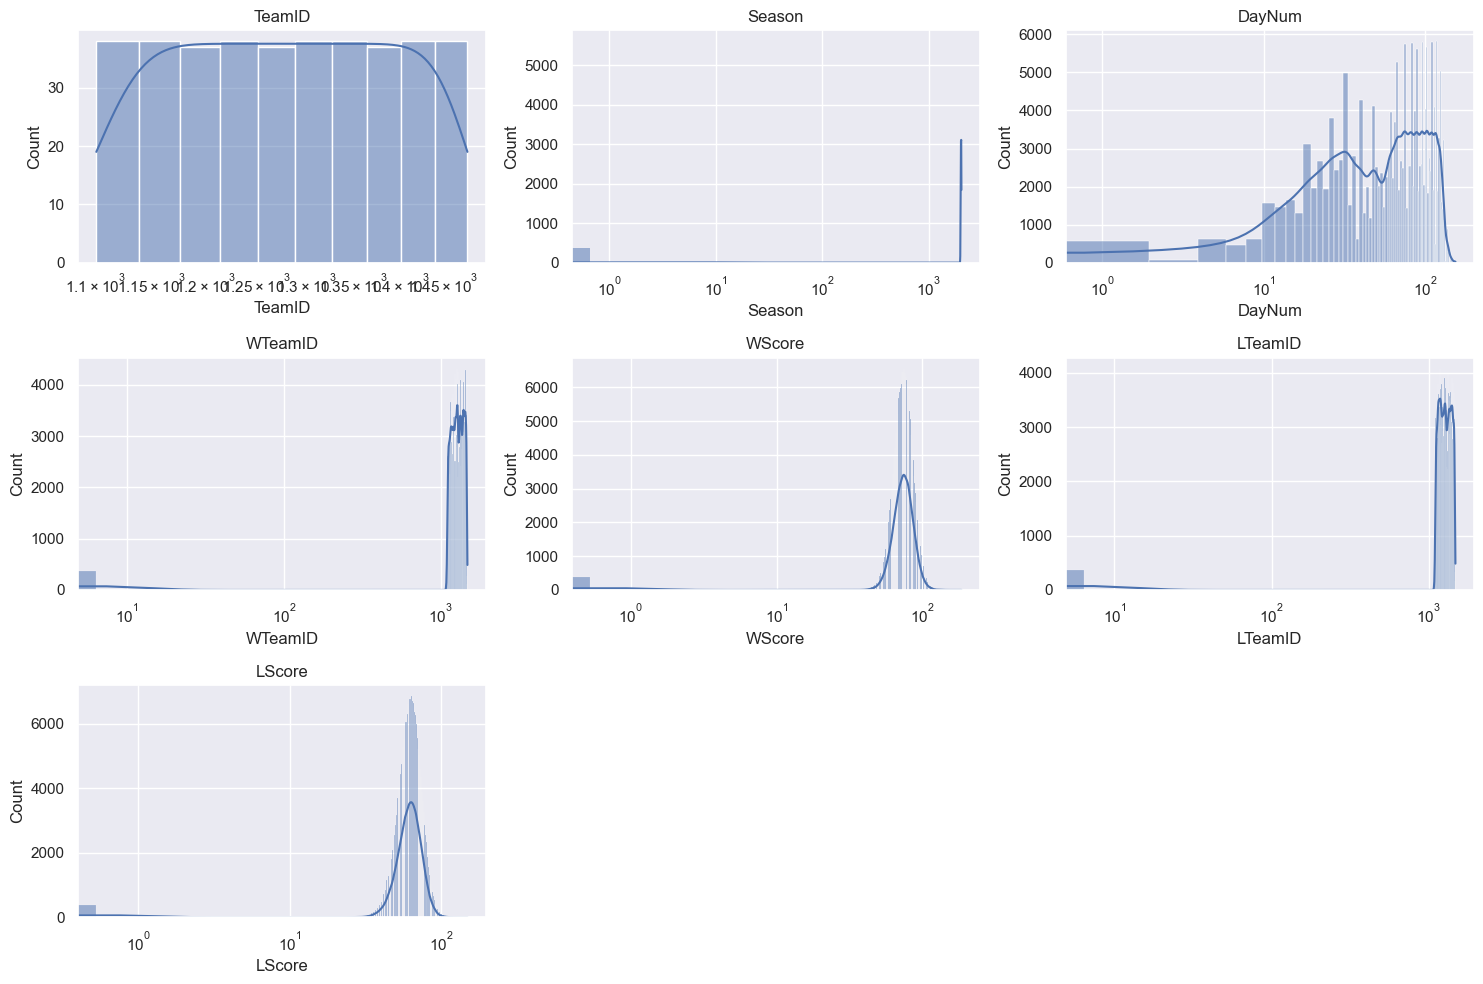

In [33]:
sns.set(style="darkgrid")

# Selecting numerical columns for distribution plots
numerical_cols = df_total.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_total[col], kde=True)
    plt.title(col)
    plt.xscale('log')
    plt.tight_layout()

plt.show()

# Bivariate Analysis

In this section, our goal is to delve into the relationships between different columns in our dataset to uncover valuable insights. By examining correlations, we can gain a deeper understanding of how variables relate to each other, which can be crucial for our analysis.

Additionally, we will pay special attention to outliers in our dataset. Outliers can significantly impact our analysis, potentially skewing results or leading to erroneous conclusions. By identifying and addressing outliers, we aim to ensure the integrity and accuracy of our analysis, thus avoiding any complications that may arise from using skewed data

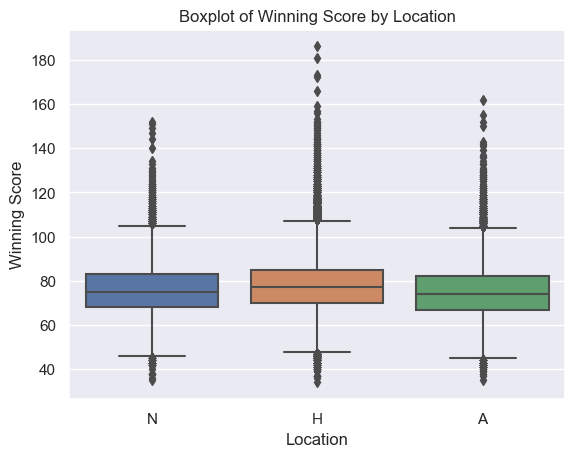

In [68]:
sns.boxplot(data=df_total, y='WScore', x ='WLoc')
plt.title('Boxplot of Winning Score by Location')
plt.xlabel('Location')
plt.ylabel('Winning Score')
plt.show()


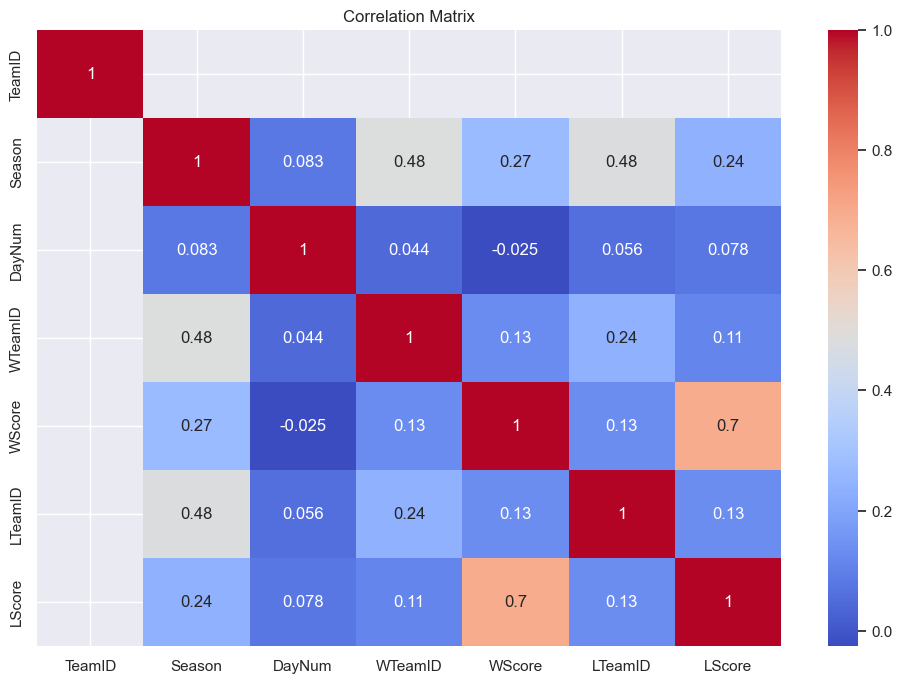

In [37]:
# Correlation Matrix
correlation_matrix = df_total.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

For the graph on the bottom we are going to use the seaborn graph jointplot we are going to have 3 graphs where the top graph we are just comparing the W score which is the x-axis and then we have y which is the L score. Towards the middle we will have both graphs combined
- The reason for why we are graphing the first one and then the second one is because in the first Graph we can See what they look like all together and the second Graph is to see a better clear look from the Bird point of view and as we can see that there is a bigger cluster and a little more accurate to a certain point.

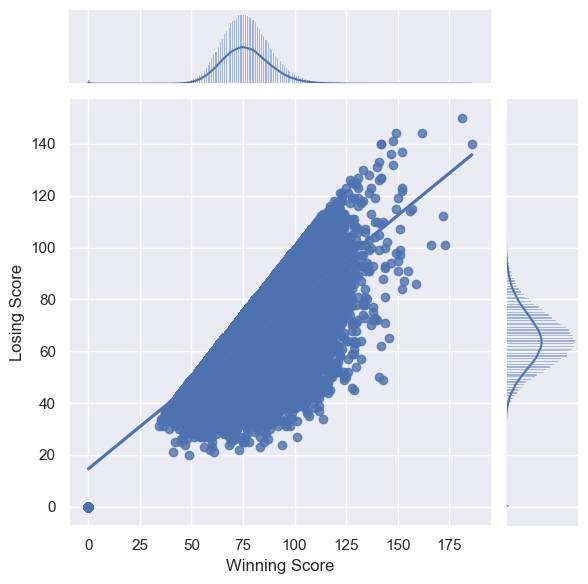

In [40]:
sns.jointplot(data=df_total, x='WScore', y='LScore', kind='reg')
plt.xlabel('Winning Score')
plt.ylabel('Losing Score')
plt.show()

<Axes: xlabel='WScore', ylabel='LScore'>

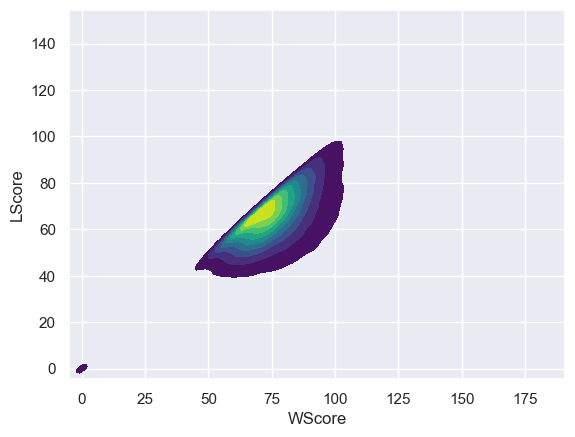

In [41]:
# This is the same as the jointplot above, but with a different kind of plot since our previous plot was a regression plot and does not show too much information
sns.kdeplot(data=df_total, x='WScore', y='LScore', fill=True, cmap='viridis')

In these two graphs we are going to compare and see if there is any relationship with the location and if it affects the score of the team. 
1) the first graph is the amount of point a team Averages when they  are playing Nuetral Away or Home
2) The second one is also the same but this time the average of the losing team when they are put in a Netraul or Home or away. 

The reason on why We are doing this to see if there are any advantages in where the teams play which can help them take a slight lead to win there games 

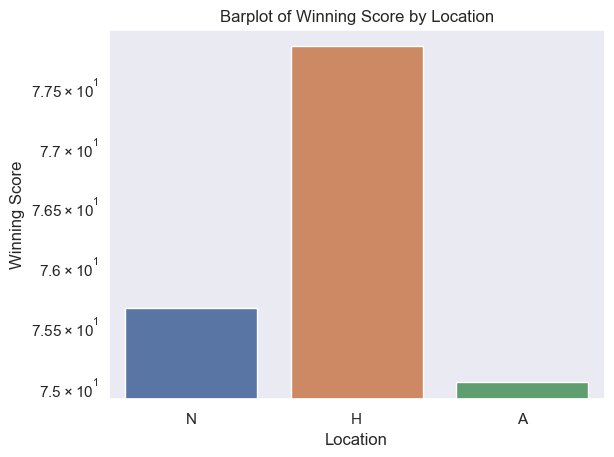

In [66]:
sns.barplot(data=df_total, x='WLoc', y='WScore', ci=None)
plt.yscale('log')
plt.title('Barplot of Winning Score by Location')
plt.xlabel('Location')
plt.ylabel('Winning Score')
plt.show()


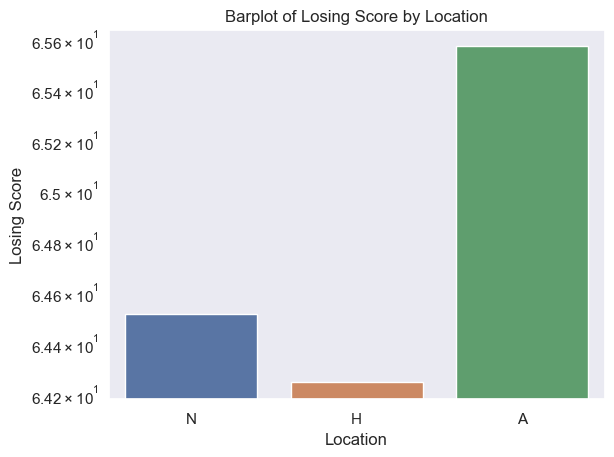

In [70]:
sns.barplot(data=df_total, x='WLoc', y='LScore', ci=None)
plt.yscale('log')
plt.title('Barplot of Losing Score by Location')
plt.xlabel('Location')
plt.ylabel('Losing Score')
plt.show()

### Adding a New Data set for our analysis.
- We have decided to analyze the 'MNCAA Tourney Details Results' CSV file in the 'Data2' folder instead of the 'M Regular season' file. This choice reflects a student's perspective, where both competitions are rewarding. However, the tournament setting often brings out a more competitive edge, with teams striving to perform at their peak. This aligns well with the spirit of March Madness, known for its intense competition and the demand for teams to perform at their best.

In [46]:
df_stats= pd.read_csv("../data2/MNCAATourneyDetailedResults.csv")

In [47]:
df_stats.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


### Filtering 
- We will filter our dataset to examine recent tournaments and analyze their potential impact on the upcoming tournament.

In [48]:
df_2022_above= df_stats[df_stats['Season'] >= 2022]
df = df_2022_above
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1181,2022,134,1231,66,1461,58,N,0,26,62,...,19,12,18,7,23,6,18,2,1,17
1182,2022,134,1411,76,1394,67,N,0,23,55,...,21,9,19,7,29,17,8,9,3,22
1183,2022,135,1323,89,1353,87,N,2,37,72,...,27,4,6,13,28,22,13,1,6,15
1184,2022,135,1460,93,1136,82,N,0,29,61,...,24,16,23,10,22,7,13,11,5,24
1185,2022,136,1116,75,1436,71,N,0,24,56,...,24,10,17,5,26,13,6,1,1,21


In [49]:
df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

# Analysis 1 
- As we look through our dataset we can see that there are some columns that we will need to drop in our transformation Notebook and here are some columns we might consider as useless to our analysis

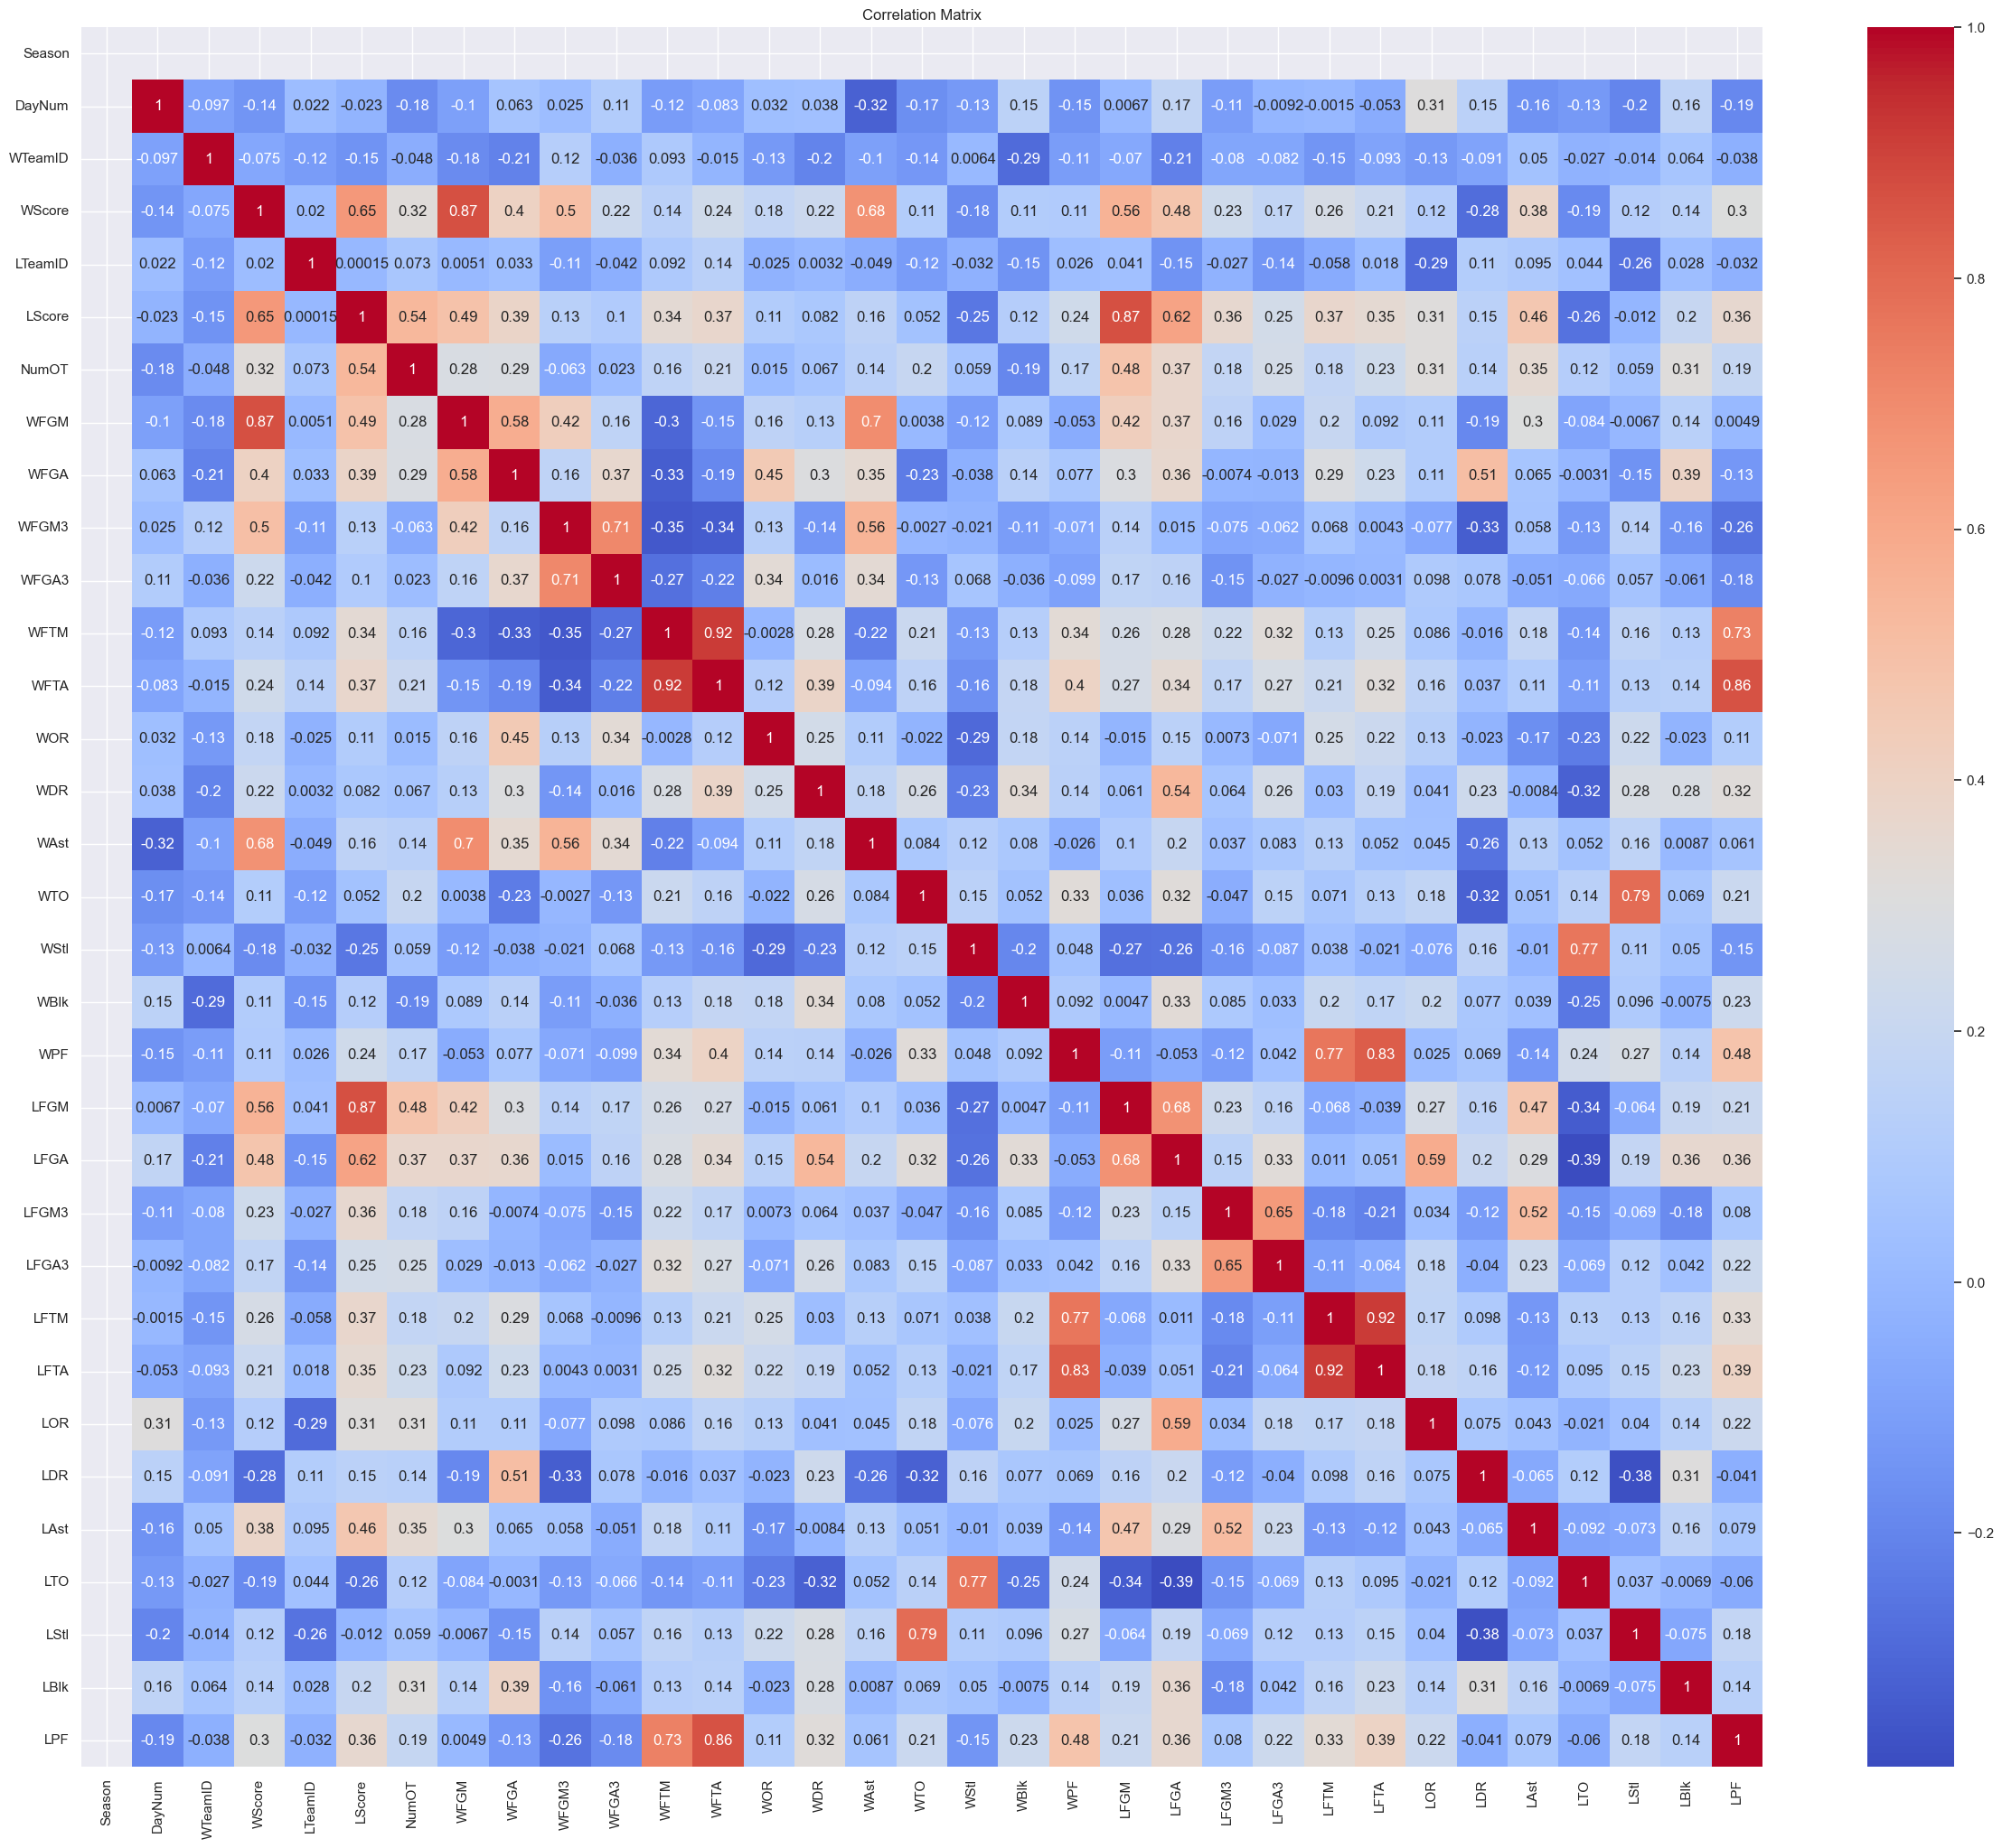

In [44]:
# Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We are comparing here the 3-points made what are the averages of games made within the tournament  and also we are going to see the amount of assists are an average in the tournament 

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WFGM3'>

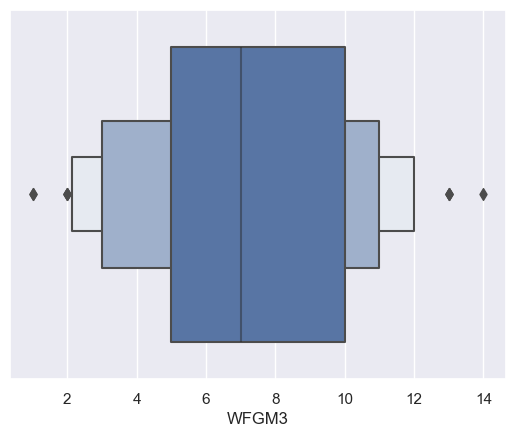

In [73]:
# This is to see The 3-point field goals made by the winning team
sns.boxenplot(data=df, x='WFGM3')


/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WFGA3'>

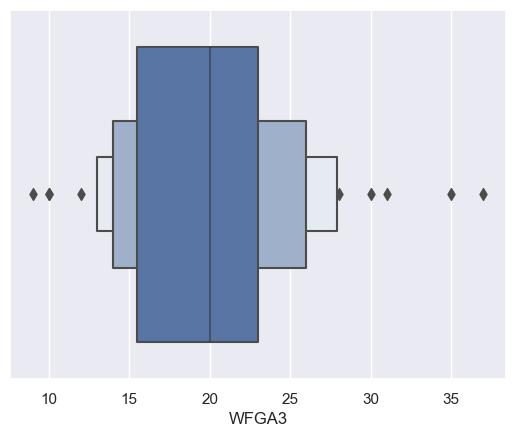

In [74]:
# This is to see The 3-point field goals assist made by the winning team
sns.boxenplot(data=df, x='WFGA3')

For this section we are checking for The amount of Offensive rebound in each game The next chart is also the same but now with the Defensive rebound 

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WOR', ylabel='Count'>

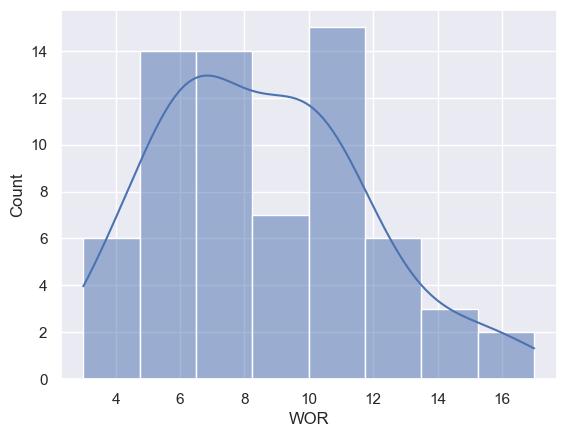

In [99]:
sns.histplot(data=df, x='WOR', kde=True)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WDR', ylabel='Count'>

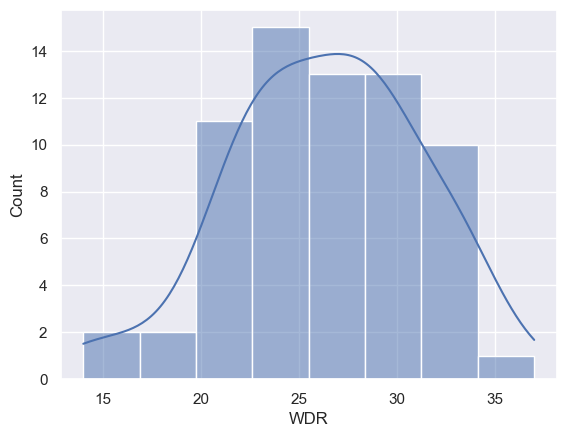

In [98]:
sns.histplot(data=df, x='WDR', kde=True)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WAst', ylabel='Count'>

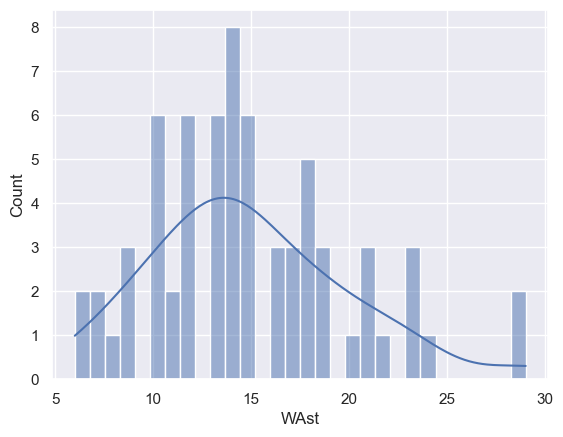

In [97]:
# This is to see the winning team's assists
sns.histplot(data=df, x='WAst', kde=True, bins=30)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WTO', ylabel='Count'>

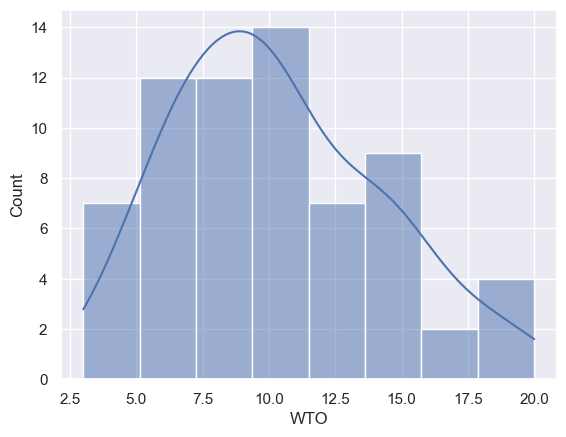

In [102]:
sns.histplot(data=df, x='WTO', kde=True)

### Here We are Writing a loop to see our numerical columns to see and compare the winning team and losing team average states when it comes to playing in tournoments ( This is going to be an alternating for the stuff that i did above so do not look at it yet)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

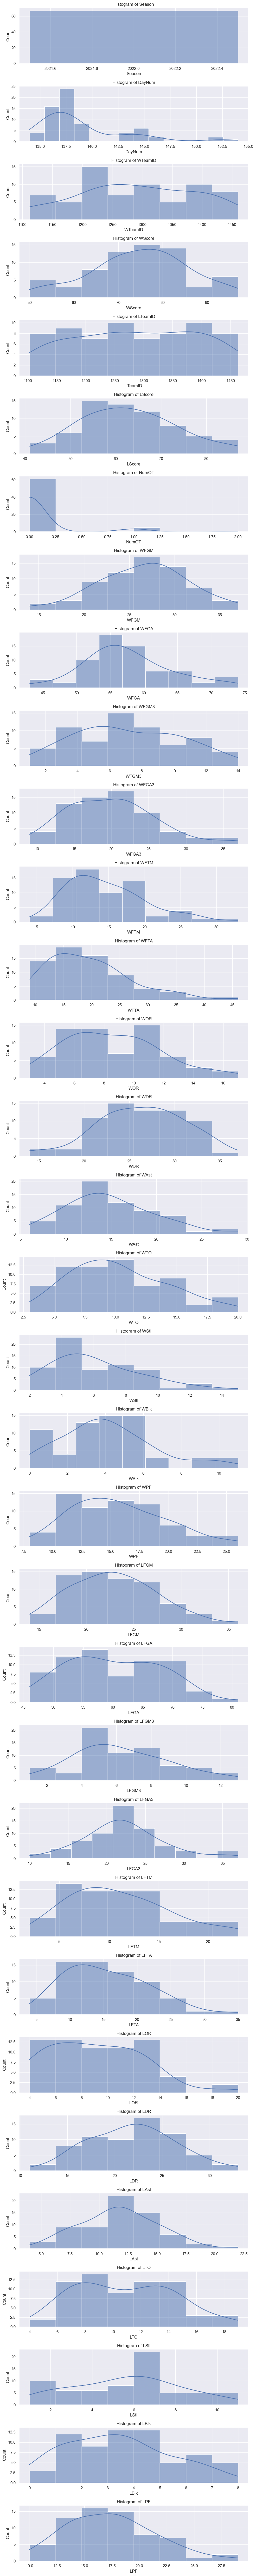

In [116]:
#num_columns = df.select_dtypes(include=['float64', 'int64']).columns
#fig, axes = plt.subplots(nrows=len(num_columns), figsize=(10, 3 * len(num_columns)))
#for col, ax in zip(num_columns, axes): # zip takes two iterables and combines them
#    sns.histplot(df[col], kde=True, ax=ax)
#    ax.set_title(f'Histogram of {col}')
 #   plt.tight_layout()

# Conclusion
Our analysis has revealed several issues within our dataset. We have identified outliers that need to be addressed and have identified columns that may not be essential for our analysis. These findings indicate that further data cleaning and refinement are necessary to ensure the quality and relevance of our dataset for our analysis.
- DayNum: The reason we are dropping this is because we are not interested in knowing this section 
- NumOT: we are dropping this column because It will not be important to analysis our data set
- WFGM: We Are not interested in Learning more about the Field goal of the team 
- WFGA: This is another one which is almost the same as WFGM but this is for assists
- Season: The reason why we are dropping this is because we do not have to worry about it anymore since all we wanted was to have the latest status for the upcoming tournoment.